In [14]:
from __future__ import division
import os
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress
from IPython.display import display
import time
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
dir = 'C:/ ... /'   #insert path here!          
wdir = 'C:/ ... /'  #insert path here!     
os.chdir(wdir)

def gen(n_states, t_advancement, y): # ilosc stanow, ilosc krokow postepu w czasie, po jakim zapisuje config, wartosc J2
    
    def imger(): # funkcja tworzaca obrazki
        kolor = 'Spectral'
        X, Y = np.meshgrid(range(N+1), range(N+1))
        f = plt.figure(figsize=(0.5*N, 0.5*N), dpi=10)
        plt.pcolormesh(X, -Y, config, cmap=str(kolor))
        plt.axis('tight')
        plt.show()
    
    
    T_start = 3.7 # t poczatkowa
    T_end = 0.7 # t koncowa, po osiagnieciu tej wartosci zapisuje config
    
    T_loops = n_states
    T_steps = t_advancement
    
    widget_A = FloatProgress(min=0, max=T_loops, description='A: Tloops', step = 1/T_loops) # widgety
    widget_B = FloatProgress(min=0, max=T_steps, description='B: Tsteps', step = 1/T_steps)
    display(widget_A, widget_B)

    N = 50 # dlugosc boku siatki

    H1 = +1 # opis uzytych funkcji hamiltona; wlasciwie znakow przed hamiltonianami
    H2 = +1
    J1 = +1
    J2 = y

    blok = np.zeros(N**2).reshape(-1,N**2) # inicjalizacja array, w ktorej bedziemy przechowywac wygenerowane stany
    config = 2*np.random.randint(2, size=(N,N))-1 # losowa konfiguracja poczatkowa

    t_start = time.time()

    for L1 in range(1, T_loops+1):                      # = ilosc wygenerowanych stanow (n_states)
        #if L1 % (0.01 * T_loops) == 0: print("{0:.1f}".format(L1/T_loops*100)+' %')

        widget_A.value += 1        
        #if widget_A.value == T_loops: widget_A.value = 0

        config = 2*np.random.randint(2, size=(N,N))-1
        print('\n\nKonfiguracja startowa')
        imger()

        for L2 in range(T_steps+1):                          # = kroki postepu w czasie
            widget_B.value += 1        
            if widget_B.value == T_steps: widget_B.value = 0

            temp = T_start - ((T_start - T_end) * L2/t_advancement) #temp zalezy od t_advancement, rowne krokom t_advancement
            beta = 1.0 / temp
            print("{0:.2f}".format(temp))
            
            for L3 in range(N**2):      #LOKALNE LOSOWANIE PO SIATCE 2D - POSZCZEGOLNE PIXELE, N**2 razy

                a = np.random.randint(N)  # wylosuj wspolrzedna z przedzialu                   
                b = np.random.randint(N)  # wylosuj wspolrzedna z przedzialu                    
                s =  config[a, b]         # spin punktu o lokalizacji a,b (wiersz, kolumna, num. od 0)

                #         lewy                gorny                prawy              dolny
                nn = config[(a-1)%N,b] + config[a,(b+1)%N] + config[(a+1)%N,b] + config[a,(b-1)%N]

                #         lewy-gorny                  prawy-gorny               prawy-dolny                lewy-dolny
                nnn = config[(a+1)%N,(b+1)%N] + config[(a+1)%N,(b-1)%N] + config[(a-1)%N,(b+1)%N] + config[(a-1)%N,(b-1)%N]

                H = H1*J1*s*nn + H2*J2*s*nnn # funkcja hamiltona, sluzy do badania czy flip spinu prowadzi do nizszej Energii

                if H < 0:
                    s *= -1

                elif rand() < np.exp(-beta * H):
                    s *= -1

                config[a, b] = s

                
        rconf = config.reshape(-1, N**2)
        blok = np.vstack((blok, rconf))
        #blok, type(blok)
        imger()
        widget_B.value = 0
        t_finish = time.time()
        print("{0:.2f}".format(t_finish - t_start)+'s', str(L1)+'/'+str(T_loops), blok.shape, '\n')

    blok = np.delete(blok, 0, axis = 0)
    blok[np.where(blok==-1)]=0
    blok = blok.astype('int')
    print('\n', '100%, blok.shape:', blok.shape)
    name = '05Ising0.pkl'
    pickle.dump(np.packbits(blok), open(name,'wb'))

FloatProgress(value=0.0, description='A: Tloops', max=2.0)

FloatProgress(value=0.0, description='B: Tsteps', max=50.0)



Konfiguracja startowa


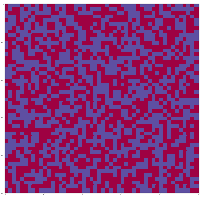

3.70
3.64
3.58
3.52
3.46
3.40
3.34
3.28
3.22
3.16
3.10
3.04
2.98
2.92
2.86
2.80
2.74
2.68
2.62
2.56
2.50
2.44
2.38
2.32
2.26
2.20
2.14
2.08
2.02
1.96
1.90
1.84
1.78
1.72
1.66
1.60
1.54
1.48
1.42
1.36
1.30
1.24
1.18
1.12
1.06
1.00
0.94
0.88
0.82
0.76
0.70


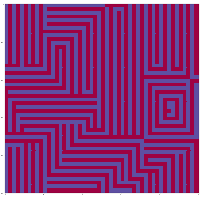

1.95s 1/2 (2, 2500) 



Konfiguracja startowa


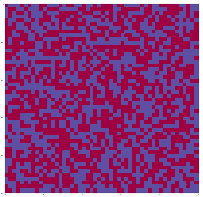

3.70
3.64
3.58
3.52
3.46
3.40
3.34
3.28
3.22
3.16
3.10
3.04
2.98
2.92
2.86
2.80
2.74
2.68
2.62
2.56
2.50
2.44
2.38
2.32
2.26
2.20
2.14
2.08
2.02
1.96
1.90
1.84
1.78
1.72
1.66
1.60
1.54
1.48
1.42
1.36
1.30
1.24
1.18
1.12
1.06
1.00
0.94
0.88
0.82
0.76
0.70


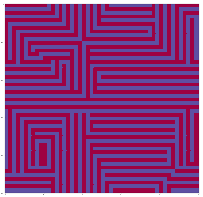

3.94s 2/2 (3, 2500) 


 100%, blok.shape: (2, 2500)


In [15]:
gen(2, 50, -345)